# Welch's method for spectral analysis

Welch's method is a spectral analysis technique used to estimate the power spectral density (PSD) of a signal. The PSD describes the distribution of power over different frequencies in a signal.

Welch's method is a modification of the periodogram method, which is a direct application of the Fourier transform. The periodogram method can be unreliable because it is sensitive to noise and variance in the data.

Welch's method overcomes these limitations by dividing the signal into overlapping segments and averaging the periodograms of these segments. This reduces the variance and noise in the estimate of the PSD, resulting in a smoother and more accurate estimate.

The key steps in Welch's method are:

Divide the signal into overlapping segments of equal length.
Apply a window function to each segment to reduce the leakage effect.
Compute the periodogram of each segment using the Fourier transform.
Average the periodograms over all segments to obtain the estimated PSD.
Welch's method is widely used in various fields, such as signal processing, audio analysis, and neuroscience. It is particularly useful when analyzing non-stationary signals, where the frequency content of the signal changes over time.






### Import and setup

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import welch, spectrogram

### Simulate data

In [10]:
n=2000
t = np.linspace(0, 4*np.pi, n)

signal1 = np.concatenate((np.sin(t), np.sin(t)))
signal2 = np.concatenate((np.sin(t), -np.sin(t)))

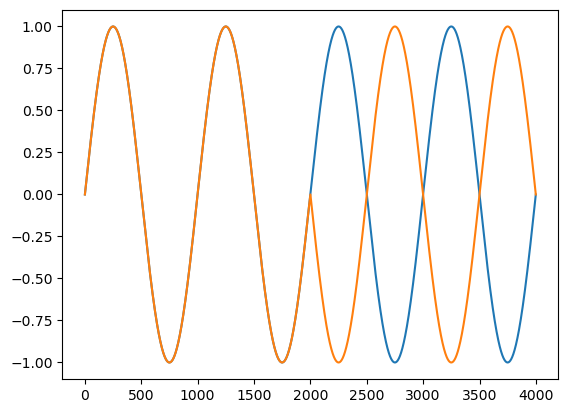

In [11]:
plt.plot(signal1)
plt.plot(signal2)

### Calculate static FFT and dynamic FFT (using welch's method)

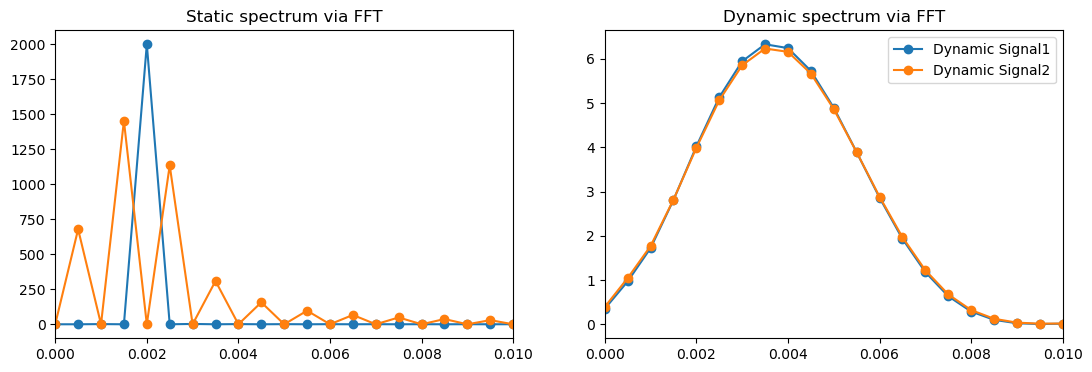

In [28]:
# static FFT
staticX1 = np.fft.fft(signal1)
staticX2 = np.fft.fft(signal2)
staticHz = np.linspace(0,1,int(len(signal1)/2+1))

# Welch's method for dynamic FFT
dynamicHz, dynamicX1 = welch(signal1, nfft=n)
dynamicHz, dynamicX2 = welch(signal2, nfft=n)

fig, ax = plt.subplots(1,2, figsize=(13,4))

ax[0].plot(staticHz, np.abs(staticX1[:len(staticHz)]), '-o', label='Signal1')
ax[0].plot(staticHz, np.abs(staticX2[:len(staticHz)]), '-o', label='Signal2')
ax[0].set_xlim([0, .01])
ax[0].set_title('Static spectrum via FFT')

ax[1].plot(dynamicHz, np.abs(dynamicX1[:len(dynamicHz)]), '-o', label='Dynamic Signal1')
ax[1].plot(dynamicHz, np.abs(dynamicX2[:len(dynamicHz)]), '-o', label='Dynamic Signal2')
ax[1].set_xlim([0, .01])
ax[1].set_title('Dynamic spectrum via FFT')

plt.legend()
plt.show()

# Spectogram
A spectrogram is a visual representation of how the frequency content of a signal changes over time. It shows the intensity of different frequencies in a signal as a function of time, with darker colors indicating higher intensity.

Imagine you are listening to a song or a sound recording. A spectrogram of that recording would show you which frequencies are present in the signal at any given time, and how strong they are. For example, if you see a lot of energy at a low frequency, it might indicate that there is a bass guitar playing at that moment.

To create a spectrogram, the signal is first divided into short segments, typically a few milliseconds long. Each segment is then analyzed using the Fourier transform to determine the frequency content of the segment. This information is then plotted as a function of time to create the spectrogram.

Spectrograms are widely used in various fields, such as audio analysis, speech recognition, and biomedical imaging. They can be used to identify different components of a signal, such as speech or music, and to visualize changes in the frequency content of a signal over time.






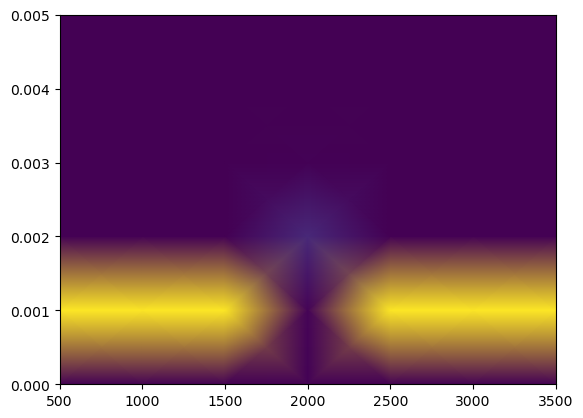

In [44]:
f, t, Sxx = spectrogram(signal2, noverlap=500, nperseg=1000)
plt.pcolormesh(t,f,Sxx,shading='gouraud')
plt.ylim([0,0.005])
plt.show()